In [1]:
import glob #to read the files
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.interpolate import interp1d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [2]:
SN = glob.glob("SN2012fr*.dat")

In [3]:
for u in range(0,len(SN)):
    SN[u] = SN[u][:-4]

In [4]:
SN[0][8:]

'19'

In [5]:
SN

['SN2012fr19',
 'SN2012fr32',
 'SN2012fr27',
 'SN2012fr23',
 'SN2012fr30',
 'SN2012fr56',
 'SN2012fr58',
 'SN2012fr25',
 'SN2012fr31',
 'SN2012fr24',
 'SN2012fr18',
 'SN2012fr52',
 'SN2012fr11',
 'SN2012fr55',
 'SN2012fr29',
 'SN2012fr68',
 'SN2012fr44',
 'SN2012fr12',
 'SN2012fr39',
 'SN2012fr17',
 'SN2012fr14',
 'SN2012fr26',
 'SN2012fr7',
 'SN2012fr21',
 'SN2012fr20',
 'SN2012fr22',
 'SN2012fr61',
 'SN2012fr48',
 'SN2012fr28',
 'SN2012fr15',
 'SN2012fr9',
 'SN2012fr34',
 'SN2012fr33',
 'SN2012fr10',
 'SN2012fr57',
 'SN2012fr40',
 'SN2012fr51',
 'SN2012fr38',
 'SN2012fr13']

In [6]:
final_gradex = np.linspace(-20, 50, 71)

In [7]:
#matplotlib notebook
#fig = plt.figure(figsize=(13,7.8))
#ax = axes3d.Axes3D(fig)

x = []
y = []

for i in range(0,len(SN)):
    
    file = open(SN[i]+'.dat')
    lines = file.readlines()
    file.close()
    
    wave=[]
    flux=[]
    
    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        wave.append(co[0])
        flux.append(co[1])
        
    wave = np.array(wave, dtype=float)
    flux = np.array(flux, dtype=float)
    
    
    
    time = []

    for j in range(0,len(wave)):
        
        time.append(final_gradex[int(SN[i][8:])])
        
    #ax.scatter3D(time,wave,flux, c='r')
    
    interpolation = interp1d(wave, flux)
    
    if min(wave)< 7000 <max(wave):
    
        x.append(final_gradex[int(SN[i][8:])])
        y.append(interpolation(7000))

<IPython.core.display.Javascript object>


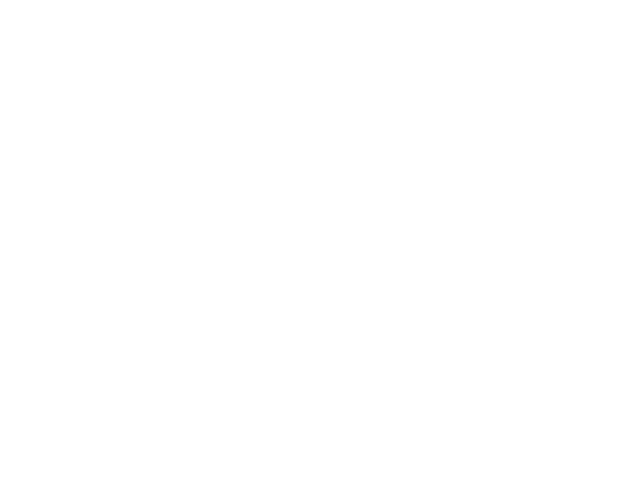

In [8]:
%matplotlib notebook

plt.plot(x, y, 'ro')
plt.show()

In [9]:
xg = []
yg = []
for i in range(0,len(x)):
    
    xg.append([x[i]])
    yg.append(y[i]*10**14)

In [10]:
kernel = 1.0 * RBF(length_scale=0.5, length_scale_bounds=(0.01, 10)) + WhiteKernel(noise_level=1e-1, noise_level_bounds=(1e-10, 1e+1))

In [11]:
X_ = np.linspace(-10, 50, 60 + 1)

In [12]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(xg, yg)
            
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)

<IPython.core.display.Javascript object>


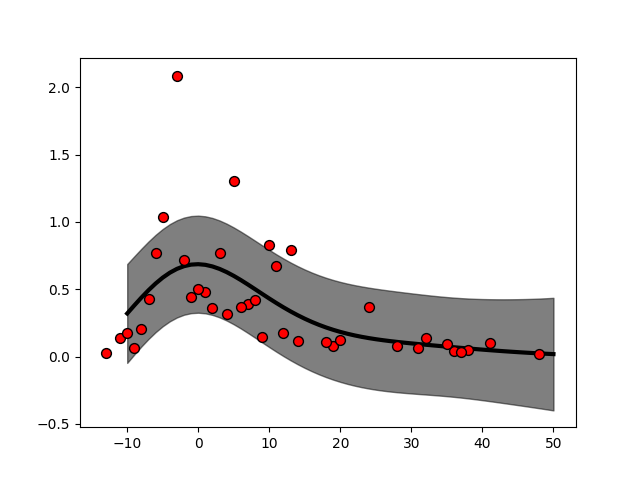

In [13]:
%matplotlib notebook

plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),y_mean + np.sqrt(np.diag(y_cov)),alpha=0.5, color='k')
plt.scatter(x, yg, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.show()